In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import statsmodels.api as sm

Load the dataset

In [3]:
file_path = "C:\\Users\\Surface\\Downloads\\Data set-20231220\\cardiac.csv"  # Update with the correct path
cardiac_data = pd.read_csv(file_path)


Map 'gender' to numeric values (0 for Female, 1 for Male)

In [4]:
cardiac_data['gender'] = cardiac_data['gender'].map({'Female': 0, 'Male': 1})

Map 'cardiac_condition' to numeric values (0 for Absent, 1 for Present)

In [5]:
cardiac_data['cardiac_condition'] = cardiac_data['cardiac_condition'].map({'Absent': 0, 'Present': 1})

Extract features and target variable

In [6]:
X = cardiac_data[['age', 'weight', 'fitness_score', 'gender']]
y = cardiac_data['cardiac_condition']

Split the dataset into train and test partitions

In [7]:
student_number_seed = 22219340  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=student_number_seed)


Standardize the features

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Fit a logistic regression model

In [9]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression()

Print the coefficients and intercept

In [10]:
print("Coefficients:", logistic_model.coef_)
print("Intercept:", logistic_model.intercept_)

Coefficients: [[ 0.90816435  0.25058146 -0.49640593  0.61276483]]
Intercept: [-0.77156577]


Use the logistic model for predictions

In [11]:
y_pred = logistic_model.predict(X_test_scaled)

Evaluate the model

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)


Confusion Matrix:
[[11  2]
 [ 5  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.85      0.76        13
           1       0.50      0.29      0.36         7

    accuracy                           0.65        20
   macro avg       0.59      0.57      0.56        20
weighted avg       0.62      0.65      0.62        20



Fit logistic regression model using statsmodels for detailed statistics

In [13]:
X_train_sm = sm.add_constant(X_train_scaled)
logistic_model_sm = sm.Logit(y_train, X_train_sm).fit()
print(logistic_model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.495715
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:      cardiac_condition   No. Observations:                   80
Model:                          Logit   Df Residuals:                       75
Method:                           MLE   Df Model:                            4
Date:                Sun, 31 Dec 2023   Pseudo R-squ.:                  0.2344
Time:                        15:40:21   Log-Likelihood:                -39.657
converged:                       True   LL-Null:                       -51.796
Covariance Type:            nonrobust   LLR p-value:                 7.028e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8001      0.288     -2.777      0.005      -1.365      -0.235
x1             0.9930      0.

Correlation Matrix Heatmap:

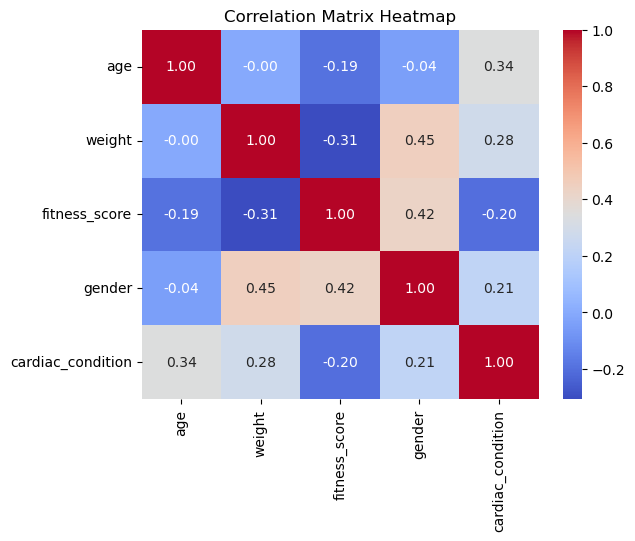

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = cardiac_data[['age', 'weight', 'fitness_score', 'gender', 'cardiac_condition']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


Coefficient Plot for Logistic Regression Model:

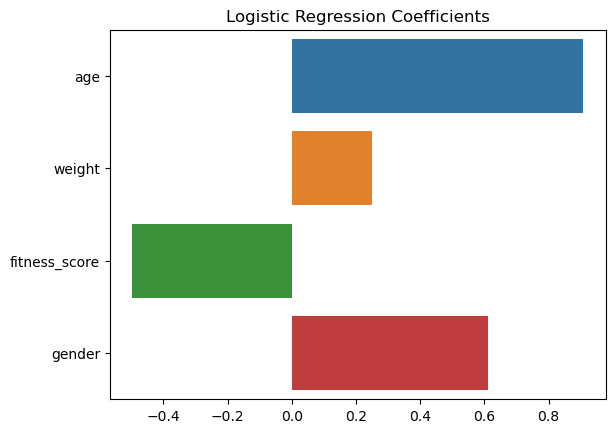

In [16]:
coef_plot = sns.barplot(x=logistic_model.coef_[0], y=X.columns)
coef_plot.set_title('Logistic Regression Coefficients')
plt.show()

ROC Curve:

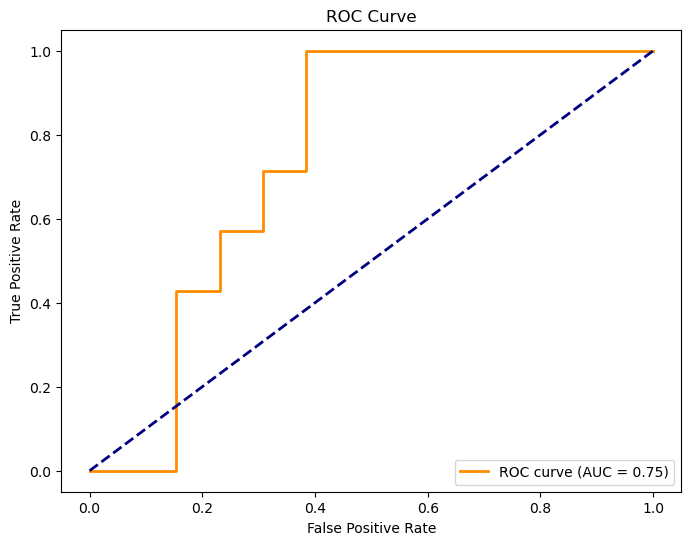

In [17]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


Distribution of Predicted Probabilities:

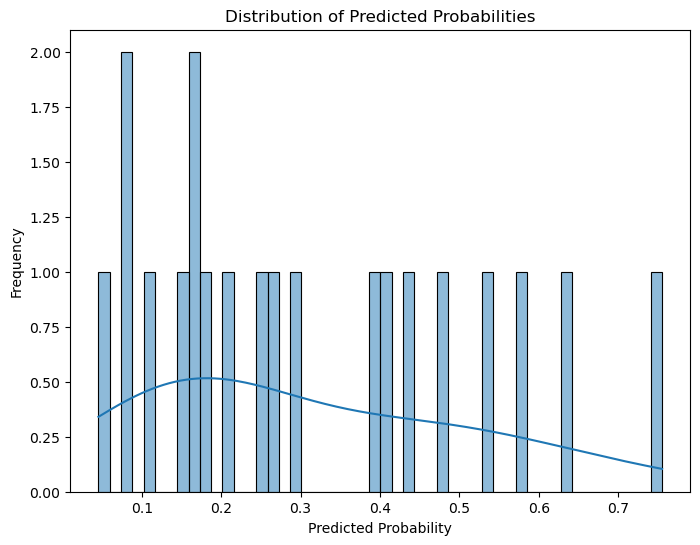

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(logistic_model.predict_proba(X_test_scaled)[:, 1], bins=50, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

Boxplots of Scaled Features:

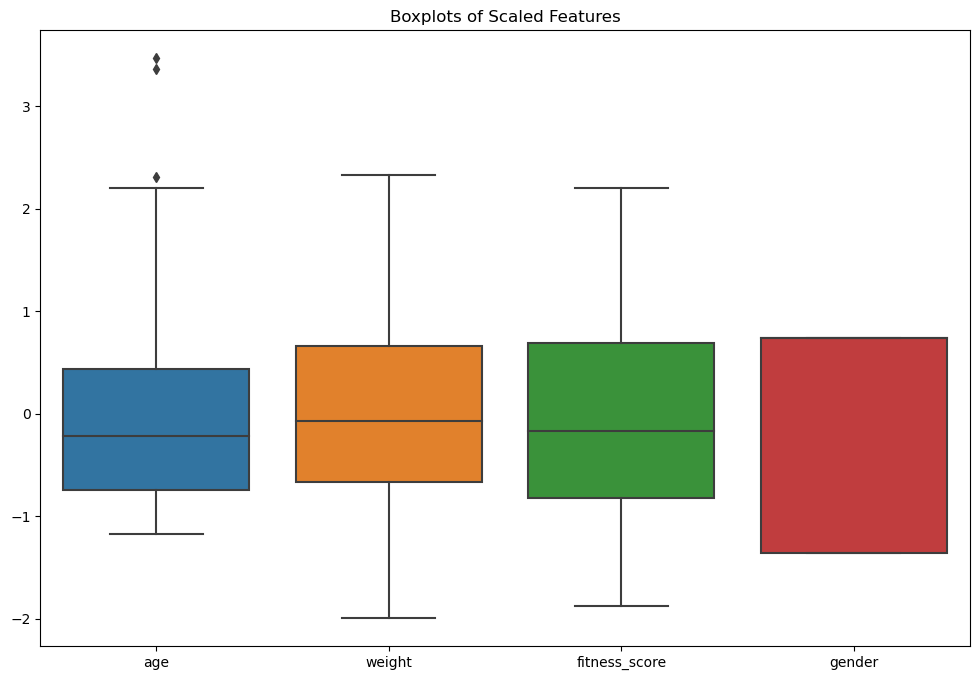

In [19]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=pd.DataFrame(X_train_scaled, columns=X.columns))
plt.title('Boxplots of Scaled Features')
plt.show()


Precision-Recall Curve

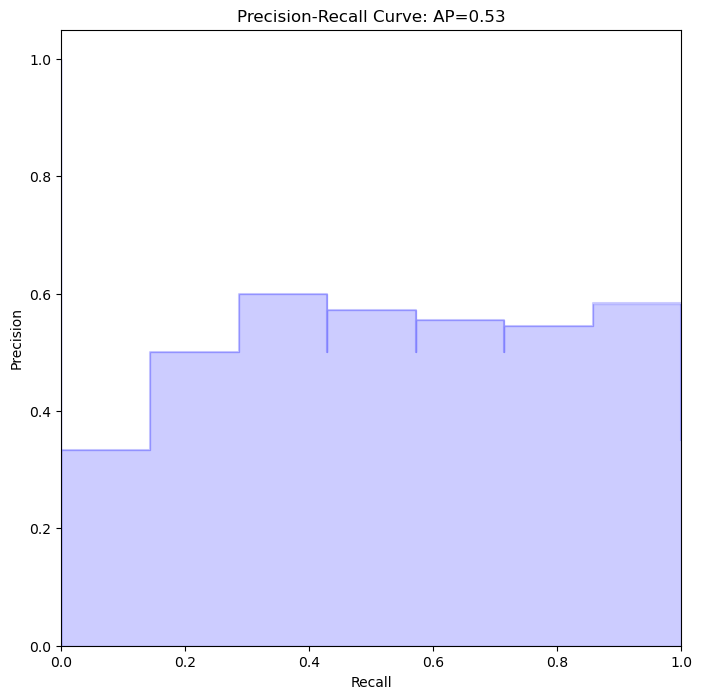

In [20]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])
average_precision = average_precision_score(y_test, logistic_model.predict_proba(X_test_scaled)[:, 1])

plt.figure(figsize=(8, 8))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve: AP={0:0.2f}'.format(average_precision))
plt.show()

Learning Curve:

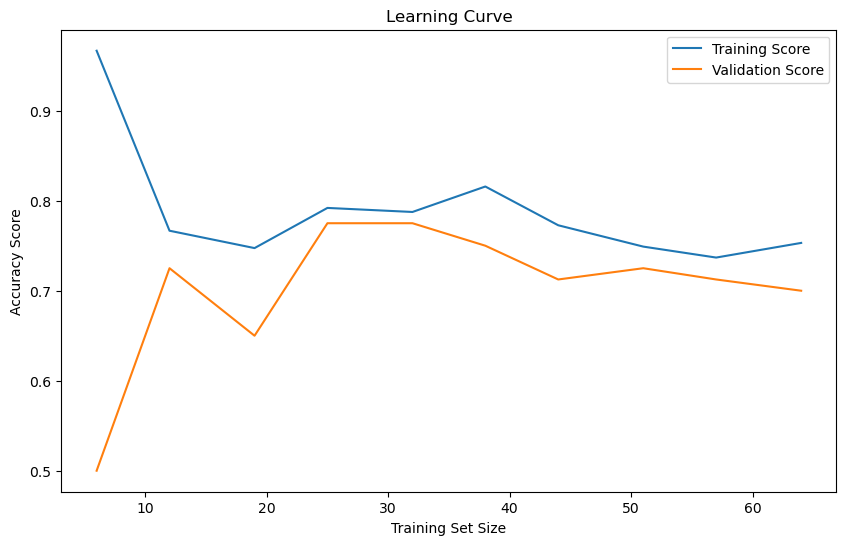

In [21]:
import numpy as np

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()


